<a href="https://colab.research.google.com/github/dkbiney-ml/learning_the_ml_ropes/blob/main/ch_03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [79]:
mnist.keys()  #how is the dataset packaged by

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [80]:
# mnist['DESCR']
X = mnist['data']
y = mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [81]:
import numpy as np

X_np = np.array(X)
y_np = np.array(y)

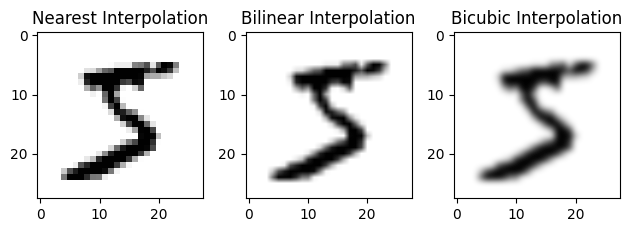

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# view data
digit = X_np[0]
img = digit.reshape(28, 28)

# plt.imshow(some_img, cmap = mpl.cm.binary, interpolation= 'nearest')
plt.subplot(131)
plt.imshow(img, interpolation='nearest',  cmap = mpl.cm.binary)
plt.title('Nearest Interpolation')

plt.subplot(132)
plt.imshow(img, interpolation='bilinear',  cmap = mpl.cm.binary)
plt.title('Bilinear Interpolation')

plt.subplot(133)
plt.imshow(img, interpolation='bicubic',  cmap = mpl.cm.binary)
plt.title('Bicubic Interpolation')

plt.tight_layout()
plt.show()

In [83]:
y_np[0]
y_np = y_np.astype(np.uint8)
y_np

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [84]:
#  Partitioning already shuffled data

X_tr, X_ts, y_tr, y_ts = X_np[:60000], X_np[60000:], y_np[:60000], y_np[60000:]

print('X train', X_tr.shape)
print('X test', X_ts.shape)
print('y train', y_tr.shape)
print('y test', y_ts.shape)

X train (60000, 784)
X test (10000, 784)
y train (60000,)
y test (10000,)


In [85]:
# classes preprocessing
y_tr_5 = y_tr == 5
y_ts_5 = y_ts == 5
y_tr_5

array([ True, False, False, ...,  True, False, False])

In [86]:
# the model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_tr, y_tr_5)

SGDClassifier(random_state=42)

In [87]:
sgd_clf.predict([X_tr[0]])

array([ True])

In [88]:
# Implementing cross validation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3)
# for train_index, test_index in skfolds.split(X_tr, y_tr_5):
#   sgd_clf_clone = clone(sgd_clf)
#   X_tr_folds = X_tr[train_index]
#   y_tr_5_folds = y_tr_5[train_index]
#   X_ts_fold = X_tr[test_index]
#   y_ts_5_fold = y_tr_5[test_index]

#   # fit this fold
#   sgd_clf_clone.fit(X_tr_folds, y_tr_5_folds)
#   preds = sgd_clf_clone.predict(X_ts_fold)
#   print( np.sum(y_ts_5_fold == preds) / len(preds))




In [89]:
# Let's get some clean predictions to help optimize
from sklearn.model_selection import cross_val_predict

y_tr_pred = cross_val_predict(sgd_clf, X_tr, y_tr_5, cv=3)

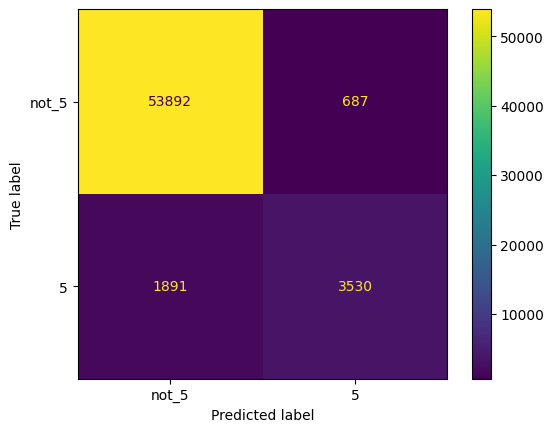

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_tr_5, y_tr_pred,)
disp = ConfusionMatrixDisplay(cm, display_labels=['not_5', '5'])
disp.plot()

In [94]:
# getting metrics in percents
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision', precision_score(y_tr_5, y_tr_pred,))
print('recall', recall_score(y_tr_5, y_tr_pred,))
print('f1', f1_score(y_tr_5, y_tr_pred,))


precision 0.8370879772350012
recall 0.6511713705958311
f1 0.7325171197343846


In [ ]:
# the precision- recall tradeoff
y_scores = sgd_clf.decision_function([X_tr[89]])
print(y_scores)